## Classification of tweets with NLP


 
#### Data: kaggle competitions download -c nlp-getting-started.

# Project Details:
### - This project deals with classification of disaster and non-disaster tweets.
### - We have used NLP to extract more information from data, specifically by using sentiment analysis and semantics.
### - Detailed version of EDA is provided inorder to gain valuable insights from data
### - Model is evaluated using classification report and accuracy score.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('C:\\Users\\HP\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\\HP\\Downloads\\test.csv')

In [4]:
test = pd.read_csv('C:\\Users\\HP\\Downloads\\test.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.shape

(7613, 5)

In [7]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
train['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [9]:
train.iloc[100]

id                                                        144
keyword                                              accident
location                                                   UK
text        .@NorwayMFA #Bahrain police had previously die...
target                                                      1
Name: 100, dtype: object

### Part 1: EDA

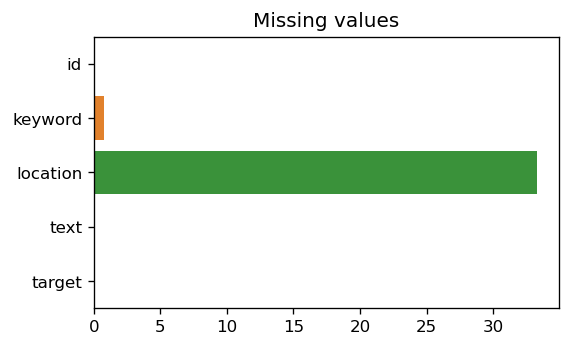

In [10]:
missing_percent = train.isnull().sum()*100 / len(train)

plt.figure(figsize=(5,3),dpi=120)
sns.barplot(y=list(missing_percent.index),x=list(missing_percent))
plt.title('Missing values');

In [11]:
train[~train['location'].isna()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


#### Keywords used

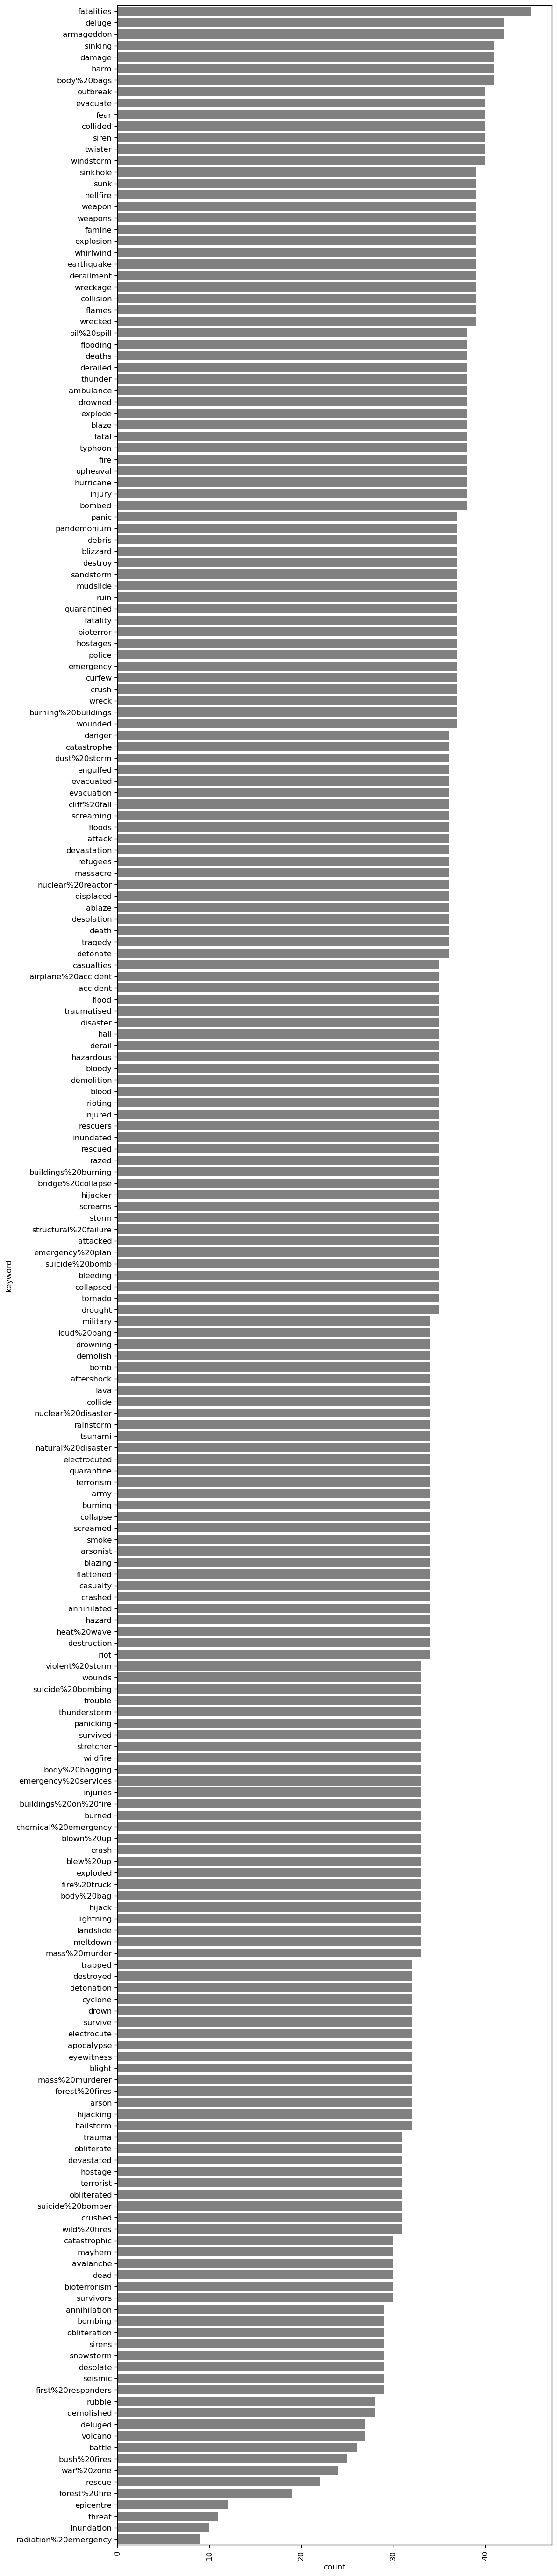

In [12]:
plt.figure(figsize=(10,60),dpi=120)
sns.countplot(data=train, y='keyword',order=train['keyword'].value_counts().index,palette=['gray'])
plt.xticks(rotation=(90));

#### Keyword used for both instances

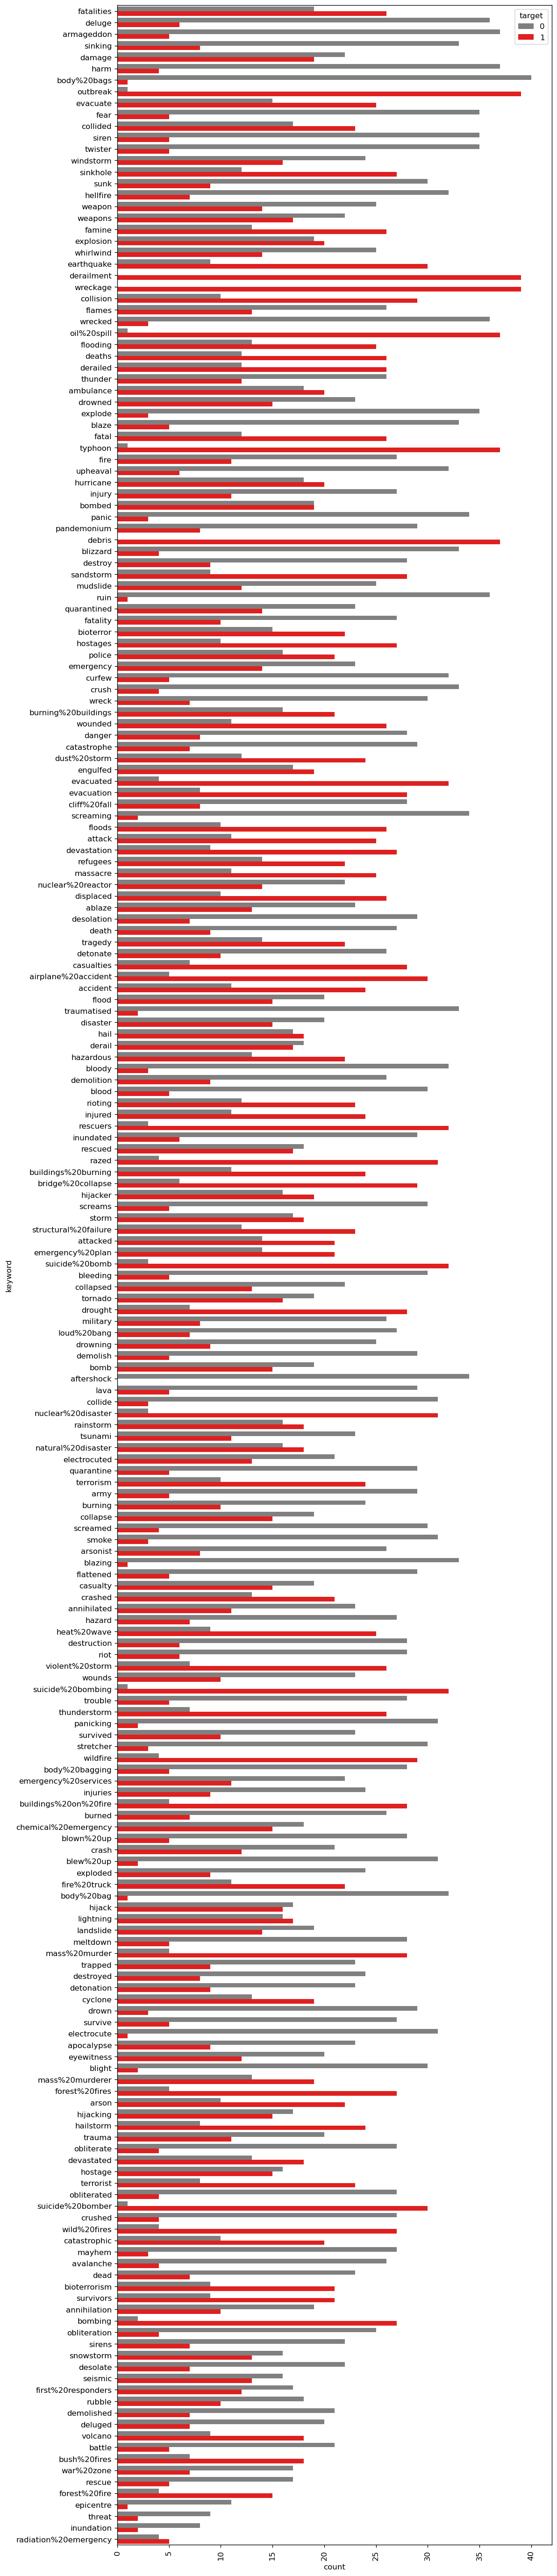

In [13]:
plt.figure(figsize=(10,60),dpi=120)
sns.countplot(data=train, y='keyword',order=train['keyword'].value_counts().index,palette=['gray','red'],hue='target')
plt.xticks(rotation=(90));

<AxesSubplot:xlabel='target', ylabel='count'>

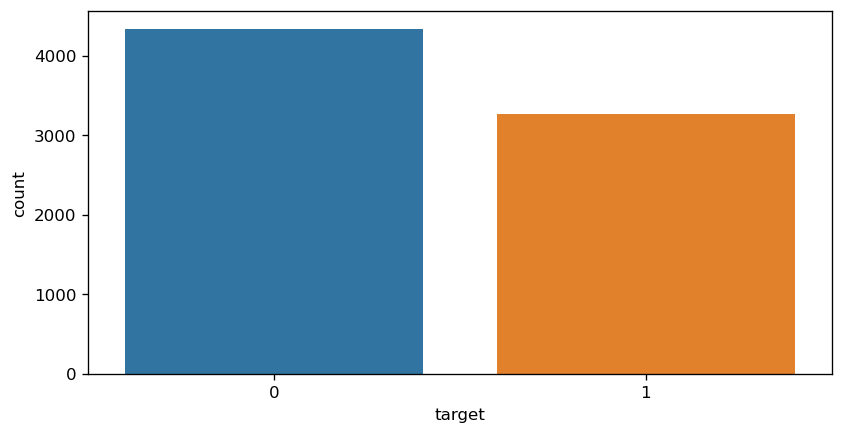

In [14]:
plt.figure(figsize=(8,4),dpi=120)
sns.countplot(data=train, x='target')

In [15]:
disaster_keyword = train[train['target']==1].groupby(['keyword','target']).count()['id'].reset_index()

In [16]:
disaster_keyword.head()

,keyword,target,id
0,ablaze,1,13
1,accident,1,24
2,airplane%20accident,1,30
3,ambulance,1,20
4,annihilated,1,11


In [17]:
fake_disaster_keyword = train[train['target']==0].groupby(['keyword','target']).count()['id'].reset_index()

In [18]:
fake_disaster_keyword.head()

,keyword,target,id
0,ablaze,0,23
1,accident,0,11
2,aftershock,0,34
3,airplane%20accident,0,5
4,ambulance,0,18


#### Top 10 disaster keywords

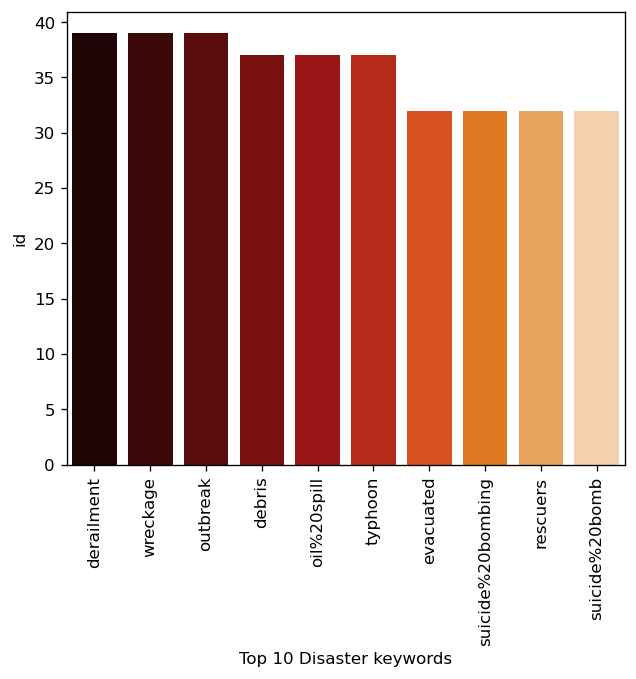

In [19]:
plt.figure(figsize=(6,5),dpi=120)
sns.barplot(data=disaster_keyword.sort_values('id',ascending=False)[:10], x='keyword',y='id',palette='gist_heat')
plt.xticks(rotation=90);
plt.xlabel('Top 10 Disaster keywords');

#### Top 10 non disaster keywords

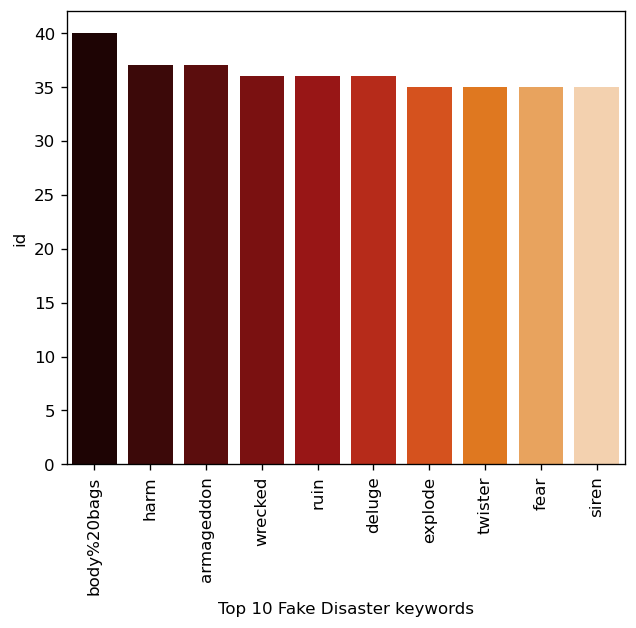

In [20]:
plt.figure(figsize=(6,5),dpi=120)
sns.barplot(x='keyword',y='id',data=fake_disaster_keyword.sort_values('id',ascending=False)[:10],palette='gist_heat')
plt.xticks(rotation=90);
plt.xlabel('Top 10 Fake Disaster keywords');

In [21]:
merged_keywords = pd.merge(left=disaster_keyword, right=fake_disaster_keyword, left_on='keyword',right_on='keyword',how='outer').fillna(0)

In [22]:
merged_keywords.drop(columns=['target_x','target_y'],inplace=True)

In [23]:
merged_keywords

,keyword,id_x,id_y
0,ablaze,13.0,23.0
1,accident,24.0,11.0
2,airplane%20accident,30.0,5.0
3,ambulance,20.0,18.0
4,annihilated,11.0,23.0
...,...,...,...
216,wounds,10.0,23.0
217,wreck,7.0,30.0
218,wreckage,39.0,0.0
219,wrecked,3.0,36.0


In [24]:
merged_keywords['probability of real disaster'] = (merged_keywords['id_x']-merged_keywords['id_y'])/merged_keywords['id_x']

In [25]:
merged_keywords.sort_values('probability of real disaster',ascending=False)[:10]

,keyword,id_x,id_y,probability of real disaster
69,derailment,39.0,0.0,1.000000
61,debris,37.0,0.0,1.000000
218,wreckage,39.0,0.0,1.000000
152,outbreak,39.0,1.0,0.974359
204,typhoon,37.0,1.0,0.972973
151,oil%20spill,37.0,1.0,0.972973
186,suicide%20bombing,32.0,1.0,0.968750
185,suicide%20bomber,30.0,1.0,0.966667
31,bombing,27.0,2.0,0.925926
165,rescuers,32.0,3.0,0.906250


In [26]:
train[train['target']==1].groupby('location')['target'].count().reset_index().sort_values(by='target')

,location,target
0,,1
979,Porthcawl,1
978,"Portage, IN / Worldwide",1
977,Port Williams NS,1
976,"Port Orange, FL",1
...,...,...
787,Mumbai,19
576,India,20
857,Nigeria,22
1258,United States,27


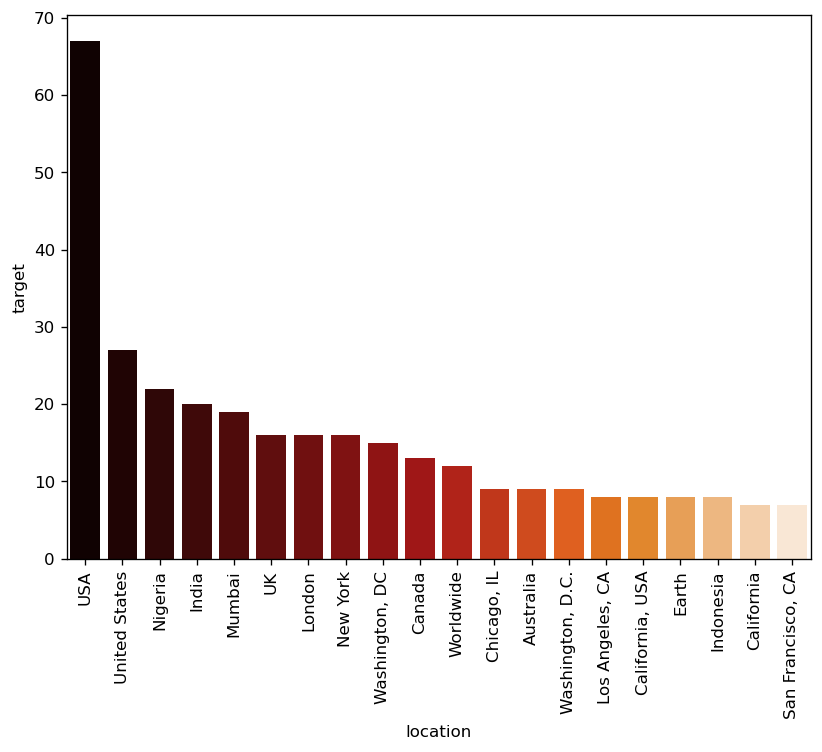

In [27]:
plt.figure(figsize=(8,6),dpi=120)
sns.barplot(x='location',y='target' ,data= train[train['target']==1].groupby('location')['target'].count().reset_index().sort_values('target',ascending=False)[:20], palette='gist_heat')
plt.xticks(rotation=90);

### Data Cleaning

In [28]:
import re

In [29]:
def remove_url(text):
    url_pattern = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    re.sub(url_pattern,'',text)
    return text

def remove_html(text):
    html_pattern = r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
    re.sub(html_pattern,'',text)
    return text

def lower_text(text):
    return text.lower()

def news(text):
    if 'news' in text:
        text = text + 'news'
        
    return text
def social_media(text):
    social_media_tags = r'@([a-z0-9]+)|#'
    re.sub(social_media_tags,'',text)
    return text

In [30]:
train['text'] = train['text'].apply(remove_url)
train['text'] = train['text'].apply(remove_html)
train['text'] = train['text'].apply(lower_text)
train['text'] = train['text'].apply(news)
train['text'] = train['text'].apply(social_media)

In [31]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [32]:
def clean_keyword(text):
    if text is not np.nan and text:
        text = text.replace('%20',' ')
        return text

In [33]:
train['keyword'] = train['keyword'].apply(clean_keyword)

In [34]:
train['keyword'].unique()

array([None, 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'deso

In [35]:
def find_numbers(text):
    numbers = re.findall(r'\d+',text)
    if numbers:
        return 1
    else:
        return 0

In [36]:
train['numbers_present'] = train['text'].apply(find_numbers)

In [37]:
train

,id,keyword,location,text,target,numbers_present
0,1,None,NaN,our deeds are the reason of this #earthquake m...,1,0
1,4,None,NaN,forest fire near la ronge sask. canada,1,0
2,5,None,NaN,all residents asked to 'shelter in place' are ...,1,0
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,None,NaN,just got sent this photo from ruby #alaska as ...,1,0
...,...,...,...,...,...,...
7608,10869,None,NaN,two giant cranes holding a bridge collapse int...,1,1
7609,10870,None,NaN,@aria_ahrary @thetawniest the out of control w...,1,0
7610,10871,None,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1
7611,10872,None,NaN,police investigating after an e-bike collided ...,1,0


In [38]:
train['numbers_present'].value_counts()

1    4525
0    3088
Name: numbers_present, dtype: int64

#### Using Sentiment Analysis

In [39]:
import nltk

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [41]:
text = 'i am happy about this'

In [42]:
sid.polarity_scores(text)

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [43]:
def sentiment(text):
    
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score


train['sentiment_score'] = train['text'].apply(sentiment)

In [44]:
train

,id,keyword,location,text,target,numbers_present,sentiment_score
0,1,None,NaN,our deeds are the reason of this #earthquake m...,1,0,0.2732
1,4,None,NaN,forest fire near la ronge sask. canada,1,0,-0.3400
2,5,None,NaN,all residents asked to 'shelter in place' are ...,1,0,-0.2960
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0.0000
4,7,None,NaN,just got sent this photo from ruby #alaska as ...,1,0,0.0000
...,...,...,...,...,...,...,...
7608,10869,None,NaN,two giant cranes holding a bridge collapse int...,1,1,-0.4939
7609,10870,None,NaN,@aria_ahrary @thetawniest the out of control w...,1,0,-0.5849
7610,10871,None,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0.0000
7611,10872,None,NaN,police investigating after an e-bike collided ...,1,0,-0.7845


#### if sentiment score < 0 then more chance of disaster

In [45]:
def pos_neg_sentiment(score):
    if score < 0:
        return 1
    else:
        return 0
    
train['sentiment'] = train['sentiment_score'].apply(pos_neg_sentiment)

In [46]:
train

,id,keyword,location,text,target,numbers_present,sentiment_score,sentiment
0,1,None,NaN,our deeds are the reason of this #earthquake m...,1,0,0.2732,0
1,4,None,NaN,forest fire near la ronge sask. canada,1,0,-0.3400,1
2,5,None,NaN,all residents asked to 'shelter in place' are ...,1,0,-0.2960,1
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0.0000,0
4,7,None,NaN,just got sent this photo from ruby #alaska as ...,1,0,0.0000,0
...,...,...,...,...,...,...,...,...
7608,10869,None,NaN,two giant cranes holding a bridge collapse int...,1,1,-0.4939,1
7609,10870,None,NaN,@aria_ahrary @thetawniest the out of control w...,1,0,-0.5849,1
7610,10871,None,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0.0000,0
7611,10872,None,NaN,police investigating after an e-bike collided ...,1,0,-0.7845,1


In [47]:
train.drop(columns='sentiment_score',axis=1,inplace=True)

In [48]:
train

,id,keyword,location,text,target,numbers_present,sentiment
0,1,None,NaN,our deeds are the reason of this #earthquake m...,1,0,0
1,4,None,NaN,forest fire near la ronge sask. canada,1,0,1
2,5,None,NaN,all residents asked to 'shelter in place' are ...,1,0,1
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1,1,0
4,7,None,NaN,just got sent this photo from ruby #alaska as ...,1,0,0
...,...,...,...,...,...,...,...
7608,10869,None,NaN,two giant cranes holding a bridge collapse int...,1,1,1
7609,10870,None,NaN,@aria_ahrary @thetawniest the out of control w...,1,0,1
7610,10871,None,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0
7611,10872,None,NaN,police investigating after an e-bike collided ...,1,0,1


In [49]:
train.shape

(7613, 7)

In [50]:
train.isnull().sum()

id                    0
keyword              61
location           2533
text                  0
target                0
numbers_present       0
sentiment             0
dtype: int64

In [51]:
train.fillna('',inplace=True)

In [52]:
train.isnull().sum()

id                 0
keyword            0
location           0
text               0
target             0
numbers_present    0
sentiment          0
dtype: int64

#### Checking for blank tweets

In [53]:
blank = []
for i,idd,key,loc,text,target,num,sent in train.itertuples():
    if text.isspace():
        blank.append(i)
        

In [54]:
blank

[]

### Using Semantics 

In [55]:
import spacy

In [56]:
nlp = spacy.load('en_core_web_md')

In [57]:
a = 'lion'
token = nlp(a)
token.vector.shape


(300,)

In [58]:
train

,id,keyword,location,text,target,numbers_present,sentiment
0,1,,,our deeds are the reason of this #earthquake m...,1,0,0
1,4,,,forest fire near la ronge sask. canada,1,0,1
2,5,,,all residents asked to 'shelter in place' are ...,1,0,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1,1,0
4,7,,,just got sent this photo from ruby #alaska as ...,1,0,0
...,...,...,...,...,...,...,...
7608,10869,,,two giant cranes holding a bridge collapse int...,1,1,1
7609,10870,,,@aria_ahrary @thetawniest the out of control w...,1,0,1
7610,10871,,,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0
7611,10872,,,police investigating after an e-bike collided ...,1,0,1


#### Using the below phrase to compare similarity between keyword

In [59]:
token = nlp(u'disaster wreckage derailment debris evacuated danger injured')

In [60]:
text = nlp(u'flooding')

In [61]:
token.similarity(text)

0.7073428091412715

In [62]:
text2 = nlp(u'happy')
token.similarity(text2)

0.15701657867781163

#### Filling empty keywords with target 1 as disaster

In [63]:
dis_key = train[(train['keyword']=="") & (train['target']==1) ]['id'].index

In [64]:
dis_key = list(dis_key)

In [65]:
for i in dis_key:
    train.at[i,'keyword'] = 'disaster'

In [66]:
train

,id,keyword,location,text,target,numbers_present,sentiment
0,1,disaster,,our deeds are the reason of this #earthquake m...,1,0,0
1,4,disaster,,forest fire near la ronge sask. canada,1,0,1
2,5,disaster,,all residents asked to 'shelter in place' are ...,1,0,1
3,6,disaster,,"13,000 people receive #wildfires evacuation or...",1,1,0
4,7,disaster,,just got sent this photo from ruby #alaska as ...,1,0,0
...,...,...,...,...,...,...,...
7608,10869,disaster,,two giant cranes holding a bridge collapse int...,1,1,1
7609,10870,disaster,,@aria_ahrary @thetawniest the out of control w...,1,0,1
7610,10871,disaster,,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0
7611,10872,disaster,,police investigating after an e-bike collided ...,1,0,1


#### Filling empty keywords with target 0 as safe

In [67]:
no_dis = train[(train['keyword']=='') & (train['target']==0)].index

In [68]:
for i in no_dis:
    train.at[i,'keyword']='safe'

In [69]:
train

,id,keyword,location,text,target,numbers_present,sentiment
0,1,disaster,,our deeds are the reason of this #earthquake m...,1,0,0
1,4,disaster,,forest fire near la ronge sask. canada,1,0,1
2,5,disaster,,all residents asked to 'shelter in place' are ...,1,0,1
3,6,disaster,,"13,000 people receive #wildfires evacuation or...",1,1,0
4,7,disaster,,just got sent this photo from ruby #alaska as ...,1,0,0
...,...,...,...,...,...,...,...
7608,10869,disaster,,two giant cranes holding a bridge collapse int...,1,1,1
7609,10870,disaster,,@aria_ahrary @thetawniest the out of control w...,1,0,1
7610,10871,disaster,,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0
7611,10872,disaster,,police investigating after an e-bike collided ...,1,0,1


In [70]:
token = nlp(u'disaster wreckage derailment debris evacuated danger injured')

In [71]:
def create_info(keyword):
    keyword = nlp(keyword)
    similarity = token.similarity(keyword)
    return similarity

train['disaster_similarity'] = train['keyword'].apply(create_info)

In [72]:
train[train['target']==0]

,id,keyword,location,text,target,numbers_present,sentiment,disaster_similarity
15,23,safe,,what's up man?,0,0,0,0.335180
16,24,safe,,i love fruits,0,0,0,0.335180
17,25,safe,,summer is lovely,0,0,0,0.335180
18,26,safe,,my car is so fast,0,0,0,0.335180
19,28,safe,,what a goooooooaaaaaal!!!!!!,0,0,0,0.335180
...,...,...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed great atmosphere at the british li...,0,0,0,0.607709
7582,10834,wrecked,,cramer: iger's 3 words that wrecked disney's s...,0,1,0,0.607709
7584,10837,safe,,these boxes are ready to explode! exploding ki...,0,1,0,0.335180
7587,10841,safe,,sirens everywhere!,0,0,0,0.335180


In [73]:
train[train['target']==1]

,id,keyword,location,text,target,numbers_present,sentiment,disaster_similarity
0,1,disaster,,our deeds are the reason of this #earthquake m...,1,0,0,0.765775
1,4,disaster,,forest fire near la ronge sask. canada,1,0,1,0.765775
2,5,disaster,,all residents asked to 'shelter in place' are ...,1,0,1,0.765775
3,6,disaster,,"13,000 people receive #wildfires evacuation or...",1,1,0,0.765775
4,7,disaster,,just got sent this photo from ruby #alaska as ...,1,0,0,0.765775
...,...,...,...,...,...,...,...,...
7608,10869,disaster,,two giant cranes holding a bridge collapse int...,1,1,1,0.765775
7609,10870,disaster,,@aria_ahrary @thetawniest the out of control w...,1,0,1,0.765775
7610,10871,disaster,,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,1,0,0.765775
7611,10872,disaster,,police investigating after an e-bike collided ...,1,0,1,0.765775


#### Creating final text by combining keyword and location along with tweet

In [74]:
def final_text(keyword,location,text):
    return text + ' location: ' + location + 'keyword: ' + keyword


train['final_text'] = train[['keyword','location','text']].apply(lambda train: final_text(train['keyword'],train['location'],train['text']),axis=1)


In [75]:
train['final_text'][0]

'our deeds are the reason of this #earthquake may allah forgive us all location: keyword: disaster'

In [76]:
train.head()

,id,keyword,location,text,target,numbers_present,sentiment,disaster_similarity,final_text
0,1,disaster,,our deeds are the reason of this #earthquake m...,1,0,0,0.765775,our deeds are the reason of this #earthquake m...
1,4,disaster,,forest fire near la ronge sask. canada,1,0,1,0.765775,forest fire near la ronge sask. canada locatio...
2,5,disaster,,all residents asked to 'shelter in place' are ...,1,0,1,0.765775,all residents asked to 'shelter in place' are ...
3,6,disaster,,"13,000 people receive #wildfires evacuation or...",1,1,0,0.765775,"13,000 people receive #wildfires evacuation or..."
4,7,disaster,,just got sent this photo from ruby #alaska as ...,1,0,0,0.765775,just got sent this photo from ruby #alaska as ...


In [77]:
trainx = train

In [78]:
train.drop(['text','location','keyword'],axis=1,inplace=True)

#### Train data is ready

In [79]:
train

,id,target,numbers_present,sentiment,disaster_similarity,final_text
0,1,1,0,0,0.765775,our deeds are the reason of this #earthquake m...
1,4,1,0,1,0.765775,forest fire near la ronge sask. canada locatio...
2,5,1,0,1,0.765775,all residents asked to 'shelter in place' are ...
3,6,1,1,0,0.765775,"13,000 people receive #wildfires evacuation or..."
4,7,1,0,0,0.765775,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
7608,10869,1,1,1,0.765775,two giant cranes holding a bridge collapse int...
7609,10870,1,0,1,0.765775,@aria_ahrary @thetawniest the out of control w...
7610,10871,1,1,0,0.765775,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611,10872,1,0,1,0.765775,police investigating after an e-bike collided ...


In [80]:
X = train.drop('target',axis=1)
y = train['target']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [82]:
X_train.shape

(6090, 5)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [84]:
vec = TfidfVectorizer()

ct = ColumnTransformer([('vector',vec,'final_text')],remainder='passthrough')

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('vector', TfidfVectorizer(), 'final_text')])

In [85]:
X_train_vec = ct.transform(X_train)

In [86]:
X_test_vec = ct.transform(X_test)

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
model = MultinomialNB()
model.fit(X_train_vec,y_train)

MultinomialNB()

In [94]:
pred = model.predict(X_test_vec)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [96]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       892
           1       0.86      0.46      0.60       631

    accuracy                           0.75      1523
   macro avg       0.79      0.70      0.71      1523
weighted avg       0.77      0.75      0.73      1523



In [97]:
confusion_matrix(y_test,pred)

array([[845,  47],
       [340, 291]], dtype=int64)

In [98]:
accuracy_score(y_test,pred)

0.7458962573867367

### Overall there is an accuracy of 75%.

#### Preparing the test data set

In [105]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [106]:
def remove_url(text):
    url_pattern = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    re.sub(url_pattern,'',text)
    return text

def remove_html(text):
    html_pattern = r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
    re.sub(html_pattern,'',text)
    return text

def lower_text(text):
    return text.lower()

def news(text):
    if 'news' in text:
        text = text + 'news'
        
    return text
def social_media(text):
    social_media_tags = r'@([a-z0-9]+)|#'
    re.sub(social_media_tags,'',text)
    return text

def clean_keyword(text):
    if text is not np.nan and text:
        text = text.replace('%20',' ')
        return text
    
def find_numbers(text):
    numbers = re.findall(r'\d+',text)
    if numbers:
        return 1
    else:
        return 0
    
def sentiment(text):
    
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score


def pos_neg_sentiment(score):
    if score < 0:
        return 1
    else:
        return 0


def create_info(keyword):
    keyword = nlp(keyword)
    similarity = token.similarity(keyword)
    return similarity





def final_text(keyword,location,text):
    return text + ' location: ' + location + 'keyword: ' + keyword




In [107]:
test['text'] = test['text'].apply(remove_url)
test['text'] = test['text'].apply(remove_html)
test['text'] = test['text'].apply(lower_text)
test['text'] = test['text'].apply(news)
test['text'] = test['text'].apply(social_media)

In [108]:
test['keyword'] = test['keyword'].apply(clean_keyword)

In [109]:
test['numbers_present'] = test['text'].apply(find_numbers)

In [110]:
test['sentiment_score'] = test['text'].apply(sentiment)

In [111]:
test['sentiment'] = test['sentiment_score'].apply(pos_neg_sentiment)

In [112]:
test.drop('sentiment_score',axis=1,inplace=True)

In [113]:
test.replace([None],np.nan,inplace=True)

In [114]:
test.fillna(' ',inplace=True)

In [115]:
test['disaster_similarity'] = test['keyword'].apply(create_info)

C:\Users\HP\AppData\Local\Temp/ipykernel_864/1908305489.py:51: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = token.similarity(keyword)


In [116]:
test['final_text'] = test[['keyword','location','text']].apply(lambda test: final_text(test['keyword'],test['location'],test['text']),axis=1)

In [117]:
test.drop(['location','text','keyword'],axis=1,inplace=True)

In [118]:
test

,id,numbers_present,sentiment,disaster_similarity,final_text
0,0,0,1,0.0,just happened a terrible car crash location: ...
1,2,0,0,0.0,"heard about #earthquake is different cities, s..."
2,3,0,1,0.0,"there is a forest fire at spot pond, geese are..."
3,9,0,0,0.0,apocalypse lighting. #spokane #wildfires locat...
4,11,1,1,0.0,typhoon soudelor kills 28 in china and taiwan ...
...,...,...,...,...,...
3258,10861,0,0,0.0,earthquake safety los angeles ûò safety faste...
3259,10865,1,1,0.0,storm in ri worse than last hurricane. my city...
3260,10868,0,0,0.0,green line derailment in chicago http://t.co/u...
3261,10874,1,0,0.0,meg issues hazardous weather outlook (hwo) htt...


In [119]:
vec = TfidfVectorizer()

CT = ColumnTransformer([('vector',vec,'final_text')],remainder='passthrough')

X = CT.fit_transform(X)

In [120]:
Xtest = CT.transform(test)

In [121]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [122]:
nb_model = MultinomialNB()
scv = SVC()
log_model = LogisticRegression()

In [123]:
nb_model.fit(X,y)
scv.fit(X,y)


SVC()

In [124]:
log_model.fit(X,y)

LogisticRegression()

In [125]:
nb_pred=nb_model.predict(Xtest)

In [126]:
scv_pred = scv.predict(Xtest)

In [127]:
log_pred = log_model.predict(Xtest)

In [128]:
df_submission = pd.DataFrame()
df_submission['id'] = test['id']
df_submission['target'] = nb_pred

In [129]:
df_submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [130]:
df_submission.to_csv("submit_1.csv",index=False)

#### Future Work
#### 1. Hyperparameter tuning
#### 2. Experiment with removing location and keyword from tweet
#### 3. Imputation of missing keywords and location in test dataset

## Thank You